Starting Sales Data Analysis Project
Generating synthetic sales data...
Generated 1096 records from 2020-01-01 to 2022-12-31
Cleaning and transforming data...
Analyzing sales data...
Creating visualizations...


C:\Users\hp\AppData\Local\Temp\ipykernel_12224\2121688134.py:81: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['Sales'] = df_clean['Sales'].fillna(method='ffill')
C:\Users\hp\AppData\Local\Temp\ipykernel_12224\2121688134.py:164: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(yearly_data, labels=years)


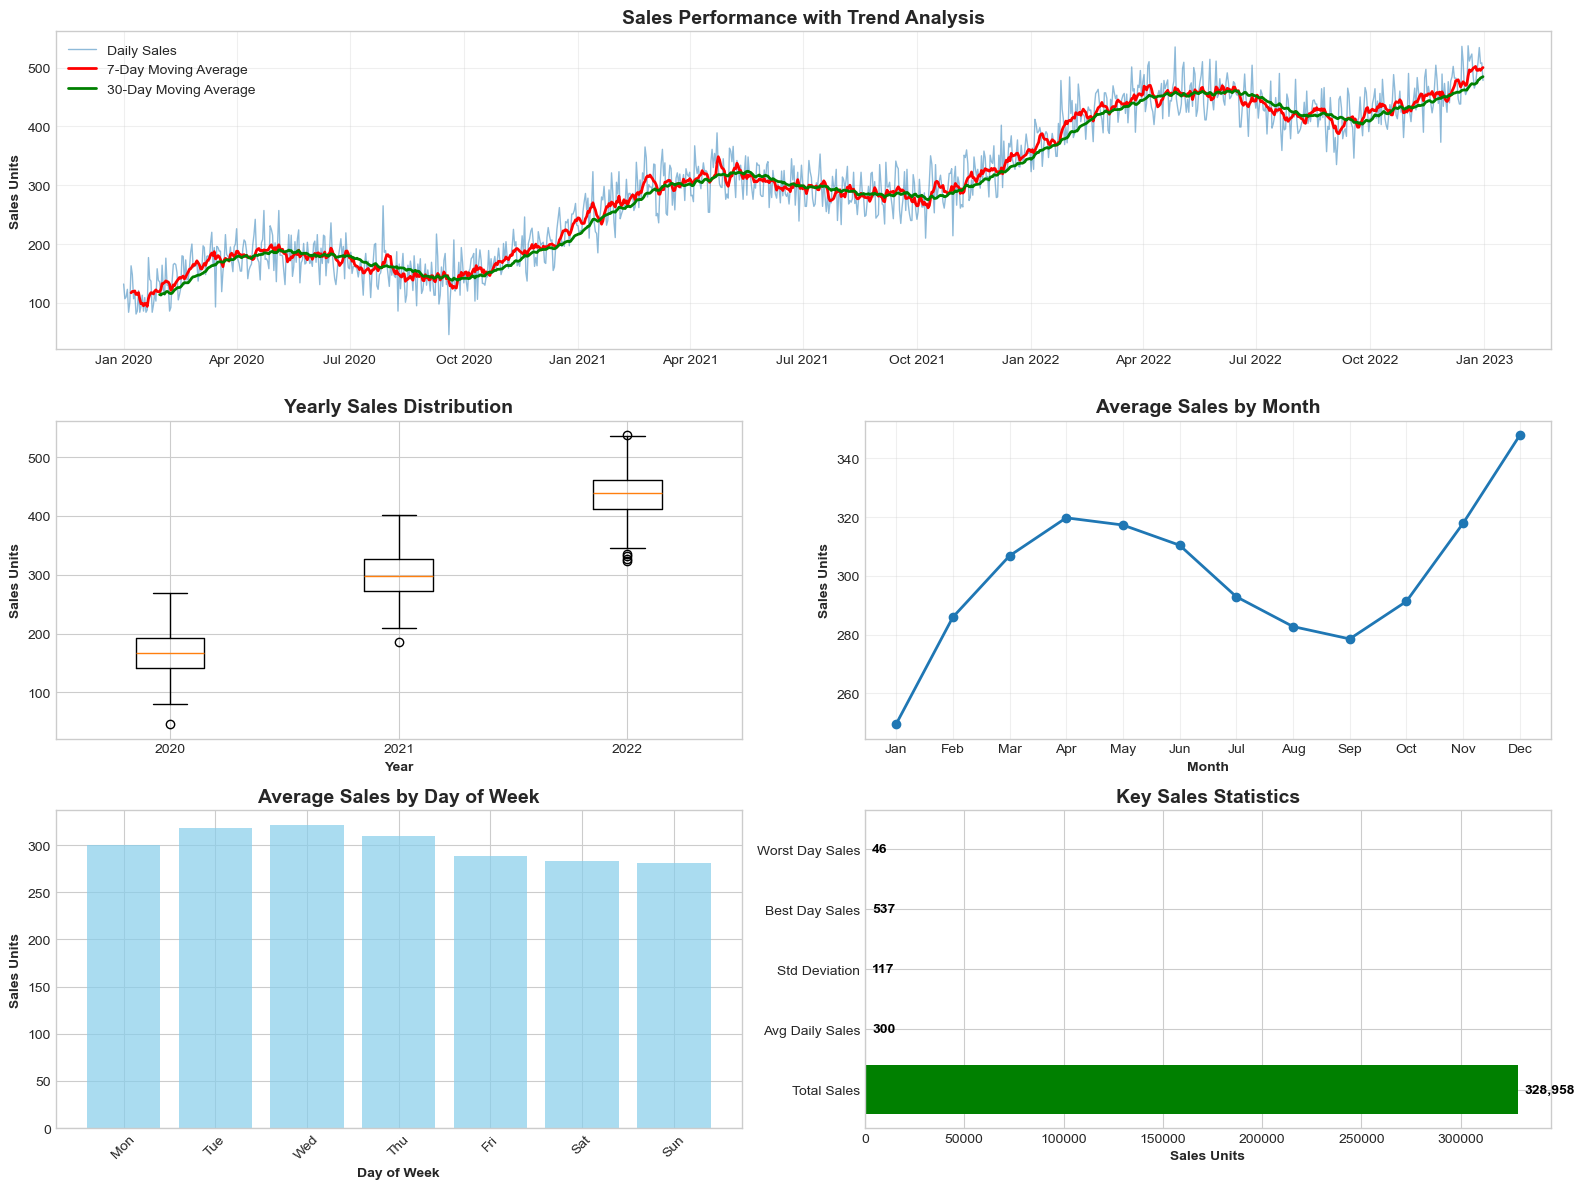


SALES ANALYSIS REPORT

Total Sales: 328,958 units
Average Daily Sales: 300.14 units
Sales Volatility (Std Dev): 116.66 units

Yearly Performance:
  2020: 60,847 units (Avg: 166.25/day)
  2021: 108,940 units (Avg: 298.47/day)
  2022: 159,171 units (Avg: 436.08/day)

Year-over-Year Growth:
  2021: +79.04%
  2022: +46.11%

Best Performing Day:
  Date: 2022-12-19, Sales: 537 units

Worst Performing Day:
  Date: 2020-09-19, Sales: 46 units

Average Sales by Day:
  Monday: 300.24 units
  Tuesday: 317.68 units
  Wednesday: 320.86 units
  Thursday: 309.78 units
  Friday: 288.73 units
  Saturday: 282.76 units
  Sunday: 280.94 units

Processed data saved to 'processed_sales_data.csv'

Analysis complete! Check 'sales_analysis.png' for visualizations.


In [1]:
"""
Sales Data Analysis Project
Author: [Your Name]
Date: [Current Date]

A comprehensive analysis of synthetic sales data demonstrating
NumPy, Pandas, and Matplotlib skills.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Set style for professional visuals
plt.style.use('seaborn-v0_8-whitegrid')

def generate_sales_data():
    """
    Generate synthetic sales data with realistic patterns using NumPy.
    Includes trend, seasonality, and random noise.
    """
    print("Generating synthetic sales data...")
    
    # Create date range
    np.random.seed(42)  # For reproducibility
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2022, 12, 31)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Generate base trend
    trend = np.linspace(100, 500, len(dates))
    
    # Add seasonality (yearly and weekly patterns)
    day_of_year = np.array([d.timetuple().tm_yday for d in dates])
    day_of_week = np.array([d.weekday() for d in dates])
    
    yearly_seasonality = 50 * np.sin(2 * np.pi * day_of_year / 365)
    weekly_seasonality = 20 * np.sin(2 * np.pi * day_of_week / 7)
    
    # Add random noise
    noise = np.random.normal(0, 25, len(dates))
    
    # Combine components
    sales = trend + yearly_seasonality + weekly_seasonality + noise
    
    # Ensure sales are positive integers
    sales = np.clip(sales, 10, None).astype(int)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Date': dates,
        'Sales': sales
    })
    
    # Add derived columns
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Month_Name'] = df['Date'].dt.month_name()
    df['Quarter'] = df['Date'].dt.quarter
    df['Day_of_Week'] = df['Date'].dt.day_name()
    
    # Introduce some missing values for demonstration
    missing_indices = np.random.choice(df.index, size=20, replace=False)
    df.loc[missing_indices, 'Sales'] = np.nan
    
    print(f"Generated {len(df)} records from {df['Date'].min().date()} to {df['Date'].max().date()}")
    return df

def clean_and_transform_data(df):
    """
    Clean and transform the sales data using Pandas.
    """
    print("Cleaning and transforming data...")
    
    # Create a copy to avoid modifying the original
    df_clean = df.copy()
    
    # Handle missing values using forward fill
    df_clean['Sales'] = df_clean['Sales'].fillna(method='ffill')
    
    # Add moving averages for trend analysis
    df_clean['MA_7'] = df_clean['Sales'].rolling(window=7).mean()
    df_clean['MA_30'] = df_clean['Sales'].rolling(window=30).mean()
    
    return df_clean

def analyze_sales_data(df):
    """
    Perform comprehensive sales data analysis using Pandas and NumPy.
    """
    print("Analyzing sales data...")
    
    # Key statistics
    total_sales = df['Sales'].sum()
    avg_daily_sales = df['Sales'].mean()
    sales_std = df['Sales'].std()
    
    # Yearly analysis
    yearly_stats = df.groupby('Year')['Sales'].agg(['sum', 'mean', 'std', 'count'])
    yearly_growth = yearly_stats['sum'].pct_change() * 100
    
    # Monthly analysis
    monthly_stats = df.groupby(['Year', 'Month_Name'])['Sales'].agg(['sum', 'mean']).reset_index()
    
    # Daily analysis
    daily_stats = df.groupby('Day_of_Week')['Sales'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    
    # Best and worst performing days
    best_day = df.loc[df['Sales'].idxmax()]
    worst_day = df.loc[df['Sales'].idxmin()]
    
    # Compile results into a dictionary
    analysis_results = {
        'total_sales': total_sales,
        'avg_daily_sales': avg_daily_sales,
        'sales_std': sales_std,
        'yearly_stats': yearly_stats,
        'yearly_growth': yearly_growth,
        'monthly_stats': monthly_stats,
        'daily_stats': daily_stats,
        'best_day': best_day,
        'worst_day': worst_day
    }
    
    return analysis_results

def visualize_results(df, analysis_results):
    """
    Create comprehensive visualizations of sales data using Matplotlib.
    """
    print("Creating visualizations...")
    
    # Create figure with subplots
    fig = plt.figure(figsize=(16, 12))
    
    # Define the grid layout
    gs = fig.add_gridspec(3, 2)
    ax1 = fig.add_subplot(gs[0, :])  # Time series plot
    ax2 = fig.add_subplot(gs[1, 0])  # Yearly comparison
    ax3 = fig.add_subplot(gs[1, 1])  # Monthly pattern
    ax4 = fig.add_subplot(gs[2, 0])  # Daily pattern
    ax5 = fig.add_subplot(gs[2, 1])  # Summary statistics
    
    # Plot 1: Time series with moving averages
    ax1.plot(df['Date'], df['Sales'], alpha=0.5, label='Daily Sales', linewidth=1)
    ax1.plot(df['Date'], df['MA_7'], color='red', linewidth=2, label='7-Day Moving Average')
    ax1.plot(df['Date'], df['MA_30'], color='green', linewidth=2, label='30-Day Moving Average')
    ax1.set_title('Sales Performance with Trend Analysis', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Sales Units', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Format x-axis for dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    
    # Plot 2: Yearly comparison
    years = df['Year'].unique()
    yearly_data = [df[df['Year'] == year]['Sales'] for year in years]
    ax2.boxplot(yearly_data, labels=years)
    ax2.set_title('Yearly Sales Distribution', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Sales Units', fontweight='bold')
    ax2.set_xlabel('Year', fontweight='bold')
    
    # Plot 3: Monthly pattern
    monthly_avg = df.groupby('Month')['Sales'].mean()
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax3.plot(range(1, 13), monthly_avg, marker='o', linewidth=2)
    ax3.set_title('Average Sales by Month', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Sales Units', fontweight='bold')
    ax3.set_xlabel('Month', fontweight='bold')
    ax3.set_xticks(range(1, 13))
    ax3.set_xticklabels(months)
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Daily pattern
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_avg = df.groupby('Day_of_Week')['Sales'].mean().reindex(days)
    ax4.bar(range(7), daily_avg, color='skyblue', alpha=0.7)
    ax4.set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Sales Units', fontweight='bold')
    ax4.set_xlabel('Day of Week', fontweight='bold')
    ax4.set_xticks(range(7))
    ax4.set_xticklabels([d[:3] for d in days], rotation=45)
    
    # Plot 5: Summary statistics
    stats_data = [
        analysis_results['total_sales'],
        analysis_results['avg_daily_sales'],
        analysis_results['sales_std'],
        analysis_results['best_day']['Sales'],
        analysis_results['worst_day']['Sales']
    ]
    
    stats_labels = [
        'Total Sales',
        'Avg Daily Sales',
        'Std Deviation',
        'Best Day Sales',
        'Worst Day Sales'
    ]
    
    ax5.barh(stats_labels, stats_data, color=['green', 'blue', 'orange', 'darkgreen', 'red'])
    ax5.set_title('Key Sales Statistics', fontsize=14, fontweight='bold')
    ax5.set_xlabel('Sales Units', fontweight='bold')
    
    # Add value labels to bars
    for i, v in enumerate(stats_data):
        ax5.text(v + max(stats_data)*0.01, i, f'{v:,.0f}', 
                color='black', fontweight='bold', va='center')
    
    plt.tight_layout()
    plt.savefig('sales_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def print_analysis_report(analysis_results):
    """
    Print a comprehensive analysis report to console.
    """
    print("\n" + "="*50)
    print("SALES ANALYSIS REPORT")
    print("="*50)
    
    print(f"\nTotal Sales: {analysis_results['total_sales']:,.0f} units")
    print(f"Average Daily Sales: {analysis_results['avg_daily_sales']:,.2f} units")
    print(f"Sales Volatility (Std Dev): {analysis_results['sales_std']:,.2f} units")
    
    print("\nYearly Performance:")
    for year, row in analysis_results['yearly_stats'].iterrows():
        print(f"  {year}: {row['sum']:,.0f} units (Avg: {row['mean']:,.2f}/day)")
    
    print("\nYear-over-Year Growth:")
    for year, growth in analysis_results['yearly_growth'].items():
        if not np.isnan(growth):
            print(f"  {year}: {growth:+.2f}%")
    
    best_day = analysis_results['best_day']
    worst_day = analysis_results['worst_day']
    
    print(f"\nBest Performing Day:")
    print(f"  Date: {best_day['Date'].date()}, Sales: {best_day['Sales']:,.0f} units")
    
    print(f"\nWorst Performing Day:")
    print(f"  Date: {worst_day['Date'].date()}, Sales: {worst_day['Sales']:,.0f} units")
    
    print("\nAverage Sales by Day:")
    for day, sales in analysis_results['daily_stats'].items():
        print(f"  {day}: {sales:,.2f} units")

def main():
    """
    Main function to run the complete sales analysis.
    """
    print("Starting Sales Data Analysis Project")
    print("="*40)
    
    # Step 1: Generate data
    sales_df = generate_sales_data()
    
    # Step 2: Clean and transform data
    cleaned_df = clean_and_transform_data(sales_df)
    
    # Step 3: Analyze data
    analysis = analyze_sales_data(cleaned_df)
    
    # Step 4: Visualize results
    fig = visualize_results(cleaned_df, analysis)
    
    # Step 5: Print report
    print_analysis_report(analysis)
    
    # Save processed data to CSV
    cleaned_df.to_csv('processed_sales_data.csv', index=False)
    print("\nProcessed data saved to 'processed_sales_data.csv'")
    
    print("\nAnalysis complete! Check 'sales_analysis.png' for visualizations.")

if __name__ == "__main__":
    main()